In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import sklearn
import mlflow
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import auc, precision_recall_curve, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from mlflow.models import infer_signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [55]:
test_data = pandas.read_csv('data/prepared/test.csv',sep=',',header=None)[1:]
validation_data = pandas.read_csv('data/prepared/validation.csv',sep=',',header=None)[1:]
train_data = pandas.read_csv('data/prepared/train.csv',sep=',',header=None)[1:]
test_data.columns=["message", "label"]
validation_data.columns=["message", "label"]
train_data.columns=["message", "label"]
msg_test,msg_validation,msg_train = test_data['message'],validation_data['message'],train_data['message']
label_test,label_validation,label_train = test_data['label'],validation_data['label'],train_data['label']

# Setting up MLflow tracking

In [56]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [57]:
# Top 3 models from Assignment 1

# Support Vector Classifier
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector classifier
])

# Linear RandomForest Classifier
pipeline_RFC = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Linear regression
])

# Logistic Regression
pipeline_LR = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Linear regression
])

# AdaBoost Classifier
pipeline_ABC = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)),  # train on TF-IDF vectors w/ AdaBoost Classifier
])

models = [
    ("Support Vector Machine", pipeline_svm),
    ("Random Forest Classifier", pipeline_RFC),
    ("Logistic Regression", pipeline_LR),
    ("AdaBoost Classifier", pipeline_ABC),
]

In [58]:
for model_name, model in models:
    with mlflow.start_run() as run:
        
        model.fit(msg_train, label_train)
        mlflow.log_params(model.get_params())
        mlflow.log_metrics({"mse": mean_squared_error(label_test, model.predict(msg_test))})

        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="sklearn-model",
            signature=infer_signature(msg_validation, label_validation),
            registered_model_name=model_name,
        )
        run_id = run.info.run_id
    
        # Print the run ID to the console
        print(model_name +", Run ID:", run_id)
        print("   ")
        

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Support Vector Machine'.
2024/02/21 05:27:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Support Vector Machine, version 1
Created version '1' of model 'Support Vector Machine'.


Support Vector Machine, Run ID: c1700d0abf5a4f8bbe276155cb84bf2a
   


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Random Forest Classifier'.
2024/02/21 05:27:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier, version 1
Created version '1' of model 'Random Forest Classifier'.


Random Forest Classifier, Run ID: 32f67e73229c46c78329dbe88c02584b
   


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Logistic Regression'.
2024/02/21 05:27:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 1
Created version '1' of model 'Logistic Regression'.


Logistic Regression, Run ID: 15859524389b4d5d956bc57bd601b52a
   


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'AdaBoost Classifier'.
2024/02/21 05:28:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: AdaBoost Classifier, version 1


AdaBoost Classifier, Run ID: ef1a8f61ae6c4efbb79b2c308e1bb661
   


Created version '1' of model 'AdaBoost Classifier'.


Model Name: Support Vector Machine, Test AUCPR = 0.9869177375852769


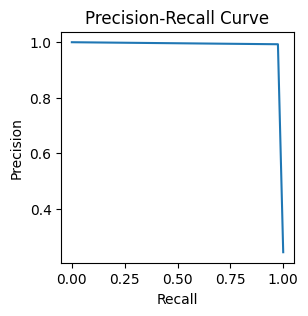

Model Name: Random Forest Classifier, Test AUCPR = 0.9439487467555508


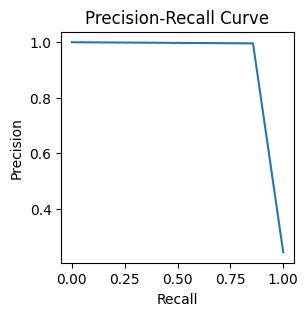

Model Name: Logistic Regression, Test AUCPR = 0.9732863752040379


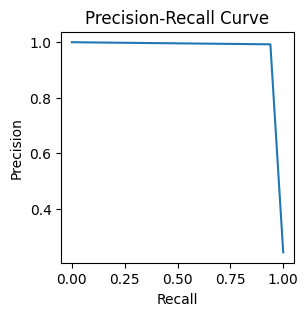

Model Name: AdaBoost Classifier, Test AUCPR = 0.9284188827439869


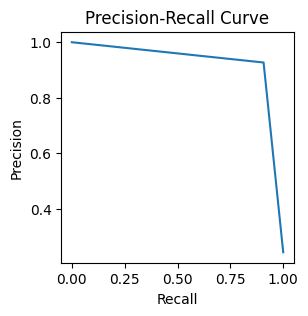

In [60]:
# Define the run IDs and model names for the four models
run_info = [
    {"run_id": "c1700d0abf5a4f8bbe276155cb84bf2a", "model_name": "Support Vector Machine"},
    {"run_id": "32f67e73229c46c78329dbe88c02584b", "model_name": "Random Forest Classifier"},
    {"run_id": "15859524389b4d5d956bc57bd601b52a", "model_name": "Logistic Regression"},
    {"run_id": "ef1a8f61ae6c4efbb79b2c308e1bb661", "model_name": "AdaBoost Classifier"}
]

for info in run_info:
    #Load the model artifact for the run ID
    model = mlflow.sklearn.load_model(f"runs:/{info['run_id']}/sklearn-model")
    #Calculate the AUCPR
    label_predict = [int(label) for label in model.predict(msg_test)]
    label_true = [int(label) for label in label_test]
    precision, recall, _ = precision_recall_curve(label_true, label_predict)
    aucpr = auc(recall, precision)
    print(f"Model Name: {info['model_name']}, Test AUCPR = {aucpr}")
    #Plot the Precision-Recall Curve
    plt.figure(figsize=(3, 3))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
        